In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score
# from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler

In [149]:
# Load datasets
customer_service_df = pd.read_csv("CustomerService.csv")
heart_disease_df = pd.read_csv("ModifiedHeartDisease.csv")

In [150]:
class LinearRegression:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.costs = []
        self.scaler = StandardScaler()

    def fit(self, X, y):
        # Standardize features
        X = self.scaler.fit_transform(X)

        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias

            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            cost = (1 / (2 * n_samples)) * np.sum((y_predicted - y) ** 2)
            self.costs.append(cost)

    # def predict(self, X):
    #     y_approximated = np.dot(X, self.weights) + self.bias
    #     return y_approximated

    def predict(self, X):
        X = self.scaler.transform(X)  # Transform test data with same scaler
        return np.dot(X, self.weights) + self.bias

    def mse(self, y_true, y_predicted):
        return np.mean((y_true - y_predicted) ** 2)

    def r2_score(self, y_true, y_predicted):
        ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
        ss_residual = np.sum((y_true - y_predicted) ** 2)
        return 1 - (ss_residual / ss_total)

    def plot_cost(self):
        plt.plot(self.costs)
        plt.xlabel("Iterations")
        plt.ylabel("Cost")
        plt.title("Linear Regression Cost Function")
        plt.show()

In [151]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
        self.costs = []
        self.scaler = StandardScaler()  # Feature scaler

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        # Standardize features
        X = self.scaler.fit_transform(X)

        num_samples, num_features = X.shape

        self.weights = np.zeros(num_features)
        self.bias = 0

        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            dw = (1 / num_samples) * np.dot(X.T, (y_predicted - y)) # gradient of cost with respect to weights
            db = (1 / num_samples) * np.sum(y_predicted - y) # gradient of cost with respect to bias

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # cost = -(1 / num_samples) * np.sum(y * np.log(y_predicted) + (1 - y) * np.log(1 - y_predicted))
            epsilon = 1e-9  # Small constant to avoid log(0)
            y_predicted = np.clip(y_predicted, epsilon, 1 - epsilon)
            cost = -(1 / num_samples) * np.sum(y * np.log(y_predicted) + (1 - y) * np.log(1 - y_predicted))

            self.costs.append(cost)

    def predict(self, X):
        X = self.scaler.transform(X)  # Transform test data with same scaler
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        return np.array([0 if i < 0.5 else 1 for i in y_predicted])

    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        # print("Accuracy:", accuracy_score(y_test, y_pred))
        # print("Precision:", precision_score(y_test, y_pred))
        # print("Recall:", recall_score(y_test, y_pred))
        # print("F1 Score:", f1_score(y_test, y_pred))

    def plot_cost(self):
        plt.plot(self.costs)
        plt.xlabel("Iterations")
        plt.ylabel("Cost")
        plt.title("Logistic Regression Cost Function")
        plt.show()

    def get_parameters(self):
        return self.weights, self.bias

In [152]:
# Function to train and evaluate models
def train_and_evaluate(X_train, X_test, y_train, y_test, model_type):
    if model_type == 'linear':
        model = LinearRegression()
    else:
        model = LogisticRegression()

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    if model_type == 'linear':
        # mse and r2_score defined in Linear Regression class
        mse = model.mse(y_test, y_pred)
        print(f"MSE: {mse}")
        r2 = model.r2_score(y_test, y_pred)
        print(f"R^2 Score: {r2}")
        return model, mse, r2_score
    else:
        # accuracy, precission, recall, and f1 implemented from sklearn.metrics
        accuracy = np.mean(y_pred == y_test)
        print(f"Accuracy: {accuracy*100}%")
        print(f"Precision:", precision_score(y_test, y_pred, zero_division=1))
        print(f"Recall:", recall_score(y_test, y_pred))
        print(f"F1 Score:", f1_score(y_test, y_pred))
        return model, accuracy, precision_score, recall_score, f1_score

In [153]:
# Process CustomerService dataset
# vectorizer = TfidfVectorizer()
# X_text = vectorizer.fit_transform(customer_service_df['Complaint_Details']).toarray()
vectorizer = CountVectorizer()
X_text = vectorizer.fit_transform(customer_service_df['Complaint_Details']).toarray()
X = np.hstack((X_text, customer_service_df[['Time_to_Resolve']]))
y = customer_service_df['Time_to_Resolve']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training Linear Regression for Customer Service dataset")
train_and_evaluate(X_train, X_test, y_train, y_test, 'linear')

# Process Heart Disease dataset
X = heart_disease_df[['age', 'cp', 'thalach']]
y = heart_disease_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training Logistic Regression for Heart Disease dataset")
train_and_evaluate(X_train, X_test, y_train, y_test, 'logistic')

Training Linear Regression for Customer Service dataset
MSE: 33.334152820887596
R^2 Score: 0.8429412324684904
Training Logistic Regression for Heart Disease dataset
Accuracy: 53.84615384615385%
Precision: 1.0
Recall: 0.0
F1 Score: 0.0


(<__main__.LogisticRegression at 0x797d3d5edbd0>,
 0.5384615384615384,
 <function sklearn.metrics._classification.precision_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')>,
 <function sklearn.metrics._classification.recall_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')>,
 <function sklearn.metrics._classification.f1_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')>)

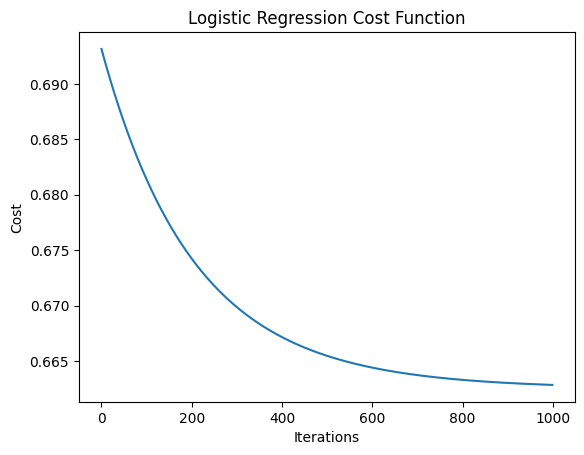

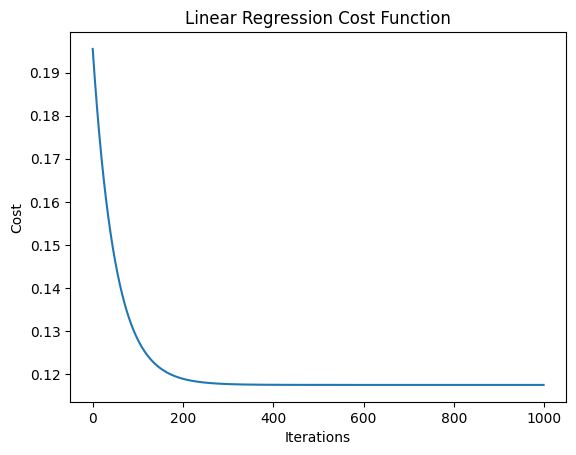

In [154]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.evaluate(X_test, y_test)
log_reg.plot_cost()

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
lin_reg.plot_cost()


Linear Regression Cost Function (Mean Squared Error - MSE)


*   The MSE cost function is quadratic and convex, meaning it has a single global minimum.
*   The cost decreases rapidly at first and then flattens as the model reaches the optimal parameters.

*   Since MSE is smooth and convex, gradient descent efficiently finds the minimum in fewer iterations.






Logistic Regression Cost Function (Log Loss)


*   Log loss is convex in ideal cases but can be non-convex if data is poorly scaled.

*   Unlike MSE, log loss does not decrease sharply; it follows an exponential decay pattern.
*   Since logistic regression predicts probabilities, the loss never reaches zero, leading to a gradual learning process.






# **How it affects model convergence**


*   **Steeper Gradient → Faster Convergence:**

A sharp drop in cost (like in linear regression) means the model converges quickly.
A slow decrease (as in logistic regression) suggests a more gradual learning process.


*   **Learning Rate Impact:**

If the learning rate is too high, the cost function may oscillate or diverge.
If it's too low, convergence is slow.
*   **Feature Scaling Matters:**

Poorly scaled data can cause gradients to be uneven, slowing convergence.


